In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data_Cleaner import data_loader_main

## Flow

In [2]:
# flow_all_close, speed_all_close, occupancy_all_close, flow_dt_close, speed_dt_close, occupancy_dt_close = data_loader_main(csv_dict='Sim_Results/Ramp_Close')
flow_all_open, speed_all_open, occupancy_all_open, flow_dt_open, speed_dt_open, occupancy_dt_open = data_loader_main(csv_dict='Sim_Results/Ramp_Open')
flow_all_ALIANA, speed_all_ALIANA, occupancy_all_ALIANA, flow_dt_ALIANA, speed_dt_ALIANA, occupancy_dt_ALIANA = data_loader_main(csv_dict='Sim_Results/Ramp_ALIANA')
flow_all_MPC, speed_all_MPC, occupancy_all_MPC, flow_dt_MPC, speed_dt_MPC, occupancy_dt_MPC = data_loader_main(csv_dict='Sim_Results/Ramp_MPC')

In [3]:
control_input = pd.read_csv('Results/Meter_Rate.csv')

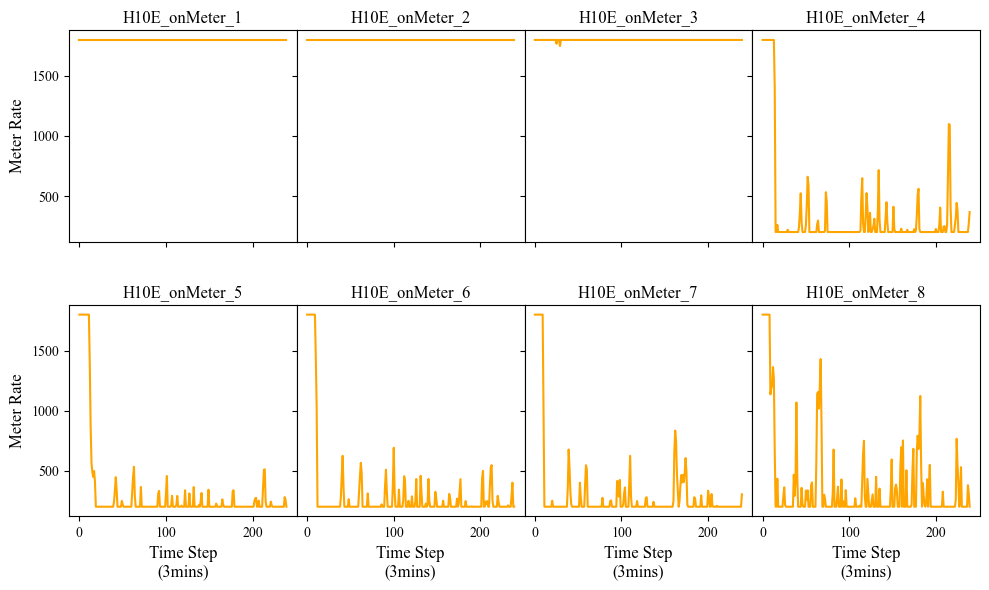

In [5]:
plt.show()
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10, 6), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(4):
        index = row*4 + col
        axs[row, col].plot(control_input.iloc[:, index], "-", label='Meter Rate', c='orange')
        axs[row, col].set_title(control_input.columns[index], fontsize=12)

for col in range(4):
    axs[1, col].set_xlabel('Time Step\n(3mins)', fontsize=12)

for row in range(2):
    axs[row, 0].set_ylabel('Meter Rate', fontsize=12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Ramp_Rate.png', dpi=300)

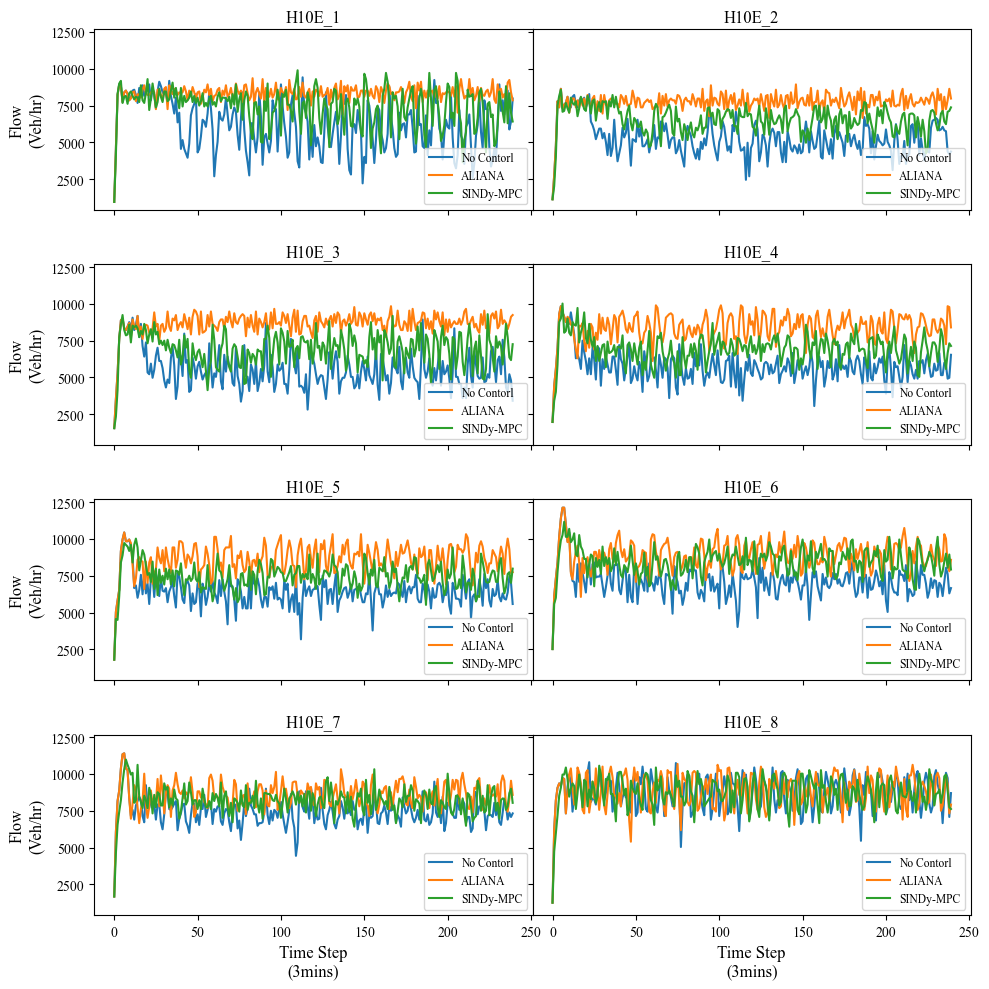

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=True)
# Plot each column in a separate subplot
for row in range(4):
    for col in range(2):
        index = row*2 + col
        #axs[row, col].plot(flow_all_close.iloc[:, index], "-", label = 'Ramp Close')
        axs[row, col].plot(flow_all_open.iloc[:, index], "-", label = 'No Contorl')
        axs[row, col].plot(flow_all_ALIANA.iloc[:, index], "-", label = 'ALIANA')
        axs[row, col].plot(flow_all_MPC.iloc[:, index], "-", label = 'SINDy-MPC')
        axs[row, col].legend(loc='lower right', fontsize='small')
        axs[row, col].set_title(flow_all_ALIANA.columns[index], fontsize=12)

for col in range(2):
    axs[3,col].set_xlabel('Time Step\n(3mins)', fontsize = 12)

for row in range(4):
    axs[row,0].set_ylabel('Flow\n(Veh/hr)', fontsize = 12)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.3, wspace=0)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/Flow_Plot.png', dpi=300)

## Dynamics